# House Rent Prediction Project

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Data Collection

In [2]:
data=pd.read_csv("House_Rent_Dataset_.csv")

# Data Preproccessing

In [3]:
data


Posted On  BHK   Rent  Size            Floor    Area Type  \
0     18-05-2022    2  10000  1100  Ground out of 2   Super Area   
1     13-05-2022    2  20000   800       1 out of 3   Super Area   
2     16-05-2022    2  17000  1000       1 out of 3   Super Area   
3     04-07-2022    2  10000   800       1 out of 2   Super Area   
4     09-05-2022    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  18-05-2022    2  15000  1000       3 out of 5  Carpet Area   
4742  15-05-2022    3  29000  2000       1 out of 4   Super Area   
4743  10-07-2022    3  35000  1750       3 out of 5  Carpet Area   
4744  06-07-2022    3  45000  1500     23 out of 34  Carpet Area   
4745  04-05-2022    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [4]:
data.head(10)

Posted On  BHK   Rent  Size            Floor    Area Type  \
0  18-05-2022    2  10000  1100  Ground out of 2   Super Area   
1  13-05-2022    2  20000   800       1 out of 3   Super Area   
2  16-05-2022    2  17000  1000       1 out of 3   Super Area   
3  04-07-2022    2  10000   800       1 out of 2   Super Area   
4  09-05-2022    2   7500   850       1 out of 2  Carpet Area   
5  29-04-2022    2   7000   600  Ground out of 1   Super Area   
6  21-06-2022    2  10000   700  Ground out of 4   Super Area   
7  21-06-2022    1   5000   250       1 out of 2   Super Area   
8  07-06-2022    2  26000   800       1 out of 2  Carpet Area   
9  20-06-2022    2  10000  1000       1 out of 3  Carpet Area   

                     Area Locality     City Furnishing Status  \
0                           Bandel  Kolkata       Unfurnished   
1         Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished   
2          Salt Lake City Sector 2  Kolkata    Semi-Furnished   
3                      Dumdum Park  Kolkata       Unfurnished   
4                    South Dum Dum  Kolkata       Unfurnished   
5                      Thakurpukur  Kolkata       Unfurnished   
6                         Malancha  Kolkata       Unfurnished   
7                         Malancha  Kolkata       Unfurnished   
8  Palm Avenue Kolkata, Ballygunge  Kolkata       Unfurnished   
9                         Natunhat  Kolkata    Semi-Furnished   

   Tenant Preferred  Bathroom Point of Contact  
0  Bachelors/Family         2    Contact Owner  
1  Bachelors/Family         1    Contact Owner  
2  Bachelors/Family         1    Contact Owner  
3  Bachelors/Family         1    Contact Owner  
4         Bachelors         1    Contact Owner  
5  Bachelors/Family         2    Contact Owner  
6         Bachelors         2    Contact Agent  
7         Bachelors         1    Contact Agent  
8         Bachelors         2    Contact Agent  
9  Bachelors/Family         2    Contact Owner

In [5]:
data.tail(10)

Posted On  BHK   Rent  Size                    Floor    Area Type  \
4736  28-06-2022    3  15000  1500  Lower Basement out of 2   Super Area   
4737  07-07-2022    3  15000  1500  Lower Basement out of 2   Super Area   
4738  06-07-2022    2  17000   855               4 out of 5  Carpet Area   
4739  06-07-2022    2  25000  1040               2 out of 4  Carpet Area   
4740  02-06-2022    2  12000  1350               2 out of 2   Super Area   
4741  18-05-2022    2  15000  1000               3 out of 5  Carpet Area   
4742  15-05-2022    3  29000  2000               1 out of 4   Super Area   
4743  10-07-2022    3  35000  1750               3 out of 5  Carpet Area   
4744  06-07-2022    3  45000  1500             23 out of 34  Carpet Area   
4745  04-05-2022    2  15000  1000               4 out of 5  Carpet Area   

                     Area Locality       City Furnishing Status  \
4736                     Almasguda  Hyderabad    Semi-Furnished   
4737                     Almasguda  Hyderabad    Semi-Furnished   
4738  Godavari Homes, Quthbullapur  Hyderabad       Unfurnished   
4739                    Gachibowli  Hyderabad       Unfurnished   
4740                     Old Alwal  Hyderabad       Unfurnished   
4741                  Bandam Kommu  Hyderabad    Semi-Furnished   
4742          Manikonda, Hyderabad  Hyderabad    Semi-Furnished   
4743          Himayath Nagar, NH 7  Hyderabad    Semi-Furnished   
4744                    Gachibowli  Hyderabad    Semi-Furnished   
4745               Suchitra Circle  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact  
4736            Family         3    Contact Owner  
4737  Bachelors/Family         3    Contact Owner  
4738         Bachelors         2    Contact Agent  
4739         Bachelors         2    Contact Owner  
4740  Bachelors/Family         2    Contact Owner  
4741  Bachelors/Family         2    Contact Owner  
4742  Bachelors/Family         3    Contact Owner  
4743  Bachelors/Family         3    Contact Agent  
4744            Family         2    Contact Agent  
4745         Bachelors         2    Contact Owner

In [6]:
data.info

<bound method DataFrame.info of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     18-05-2022    2  10000  1100  Ground out of 2   Super Area   
1     13-05-2022    2  20000   800       1 out of 3   Super Area   
2     16-05-2022    2  17000  1000       1 out of 3   Super Area   
3     04-07-2022    2  10000   800       1 out of 2   Super Area   
4     09-05-2022    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  18-05-2022    2  15000  1000       3 out of 5  Carpet Area   
4742  15-05-2022    3  29000  2000       1 out of 4   Super Area   
4743  10-07-2022    3  35000  1750       3 out of 5  Carpet Area   
4744  06-07-2022    3  45000  1500     23 out of 34  Carpet Area   
4745  04-05-2022    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
data.describe()

BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000

In [9]:
data.shape

(4746, 12)

In [10]:
data.isnull()

Posted On    BHK   Rent   Size  Floor  Area Type  Area Locality   City  \
0         False  False  False  False  False      False          False  False   
1         False  False  False  False  False      False          False  False   
2         False  False  False  False  False      False          False  False   
3         False  False  False  False  False      False          False  False   
4         False  False  False  False  False      False          False  False   
...         ...    ...    ...    ...    ...        ...            ...    ...   
4741      False  False  False  False  False      False          False  False   
4742      False  False  False  False  False      False          False  False   
4743      False  False  False  False  False      False          False  False   
4744      False  False  False  False  False      False          False  False   
4745      False  False  False  False  False      False          False  False   

      Furnishing Status  Tenant Preferred  Bathroom  Point of Contact  
0                 False             False     False             False  
1                 False             False     False             False  
2                 False             False     False             False  
3                 False             False     False             False  
4                 False             False     False             False  
...                 ...               ...       ...               ...  
4741              False             False     False             False  
4742              False             False     False             False  
4743              False             False     False             False  
4744              False             False     False             False  
4745              False             False     False             False  

[4746 rows x 12 columns]

In [11]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [12]:
data.loc[:4745,'City']

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4746, dtype: object

In [13]:
data['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [14]:
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [15]:
data['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [16]:
data['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [17]:
data['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10], dtype=int64)

In [18]:
data['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [19]:
data['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [20]:
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [21]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [22]:
data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [23]:
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [24]:
data

Posted On  BHK   Rent  Size            Floor    Area Type  \
0     18-05-2022    2  10000  1100  Ground out of 2   Super Area   
1     13-05-2022    2  20000   800       1 out of 3   Super Area   
2     16-05-2022    2  17000  1000       1 out of 3   Super Area   
3     04-07-2022    2  10000   800       1 out of 2   Super Area   
4     09-05-2022    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  18-05-2022    2  15000  1000       3 out of 5  Carpet Area   
4742  15-05-2022    3  29000  2000       1 out of 4   Super Area   
4743  10-07-2022    3  35000  1750       3 out of 5  Carpet Area   
4744  06-07-2022    3  45000  1500     23 out of 34  Carpet Area   
4745  04-05-2022    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family   
3                  Dumdum Park    Kolkata       Unfurnished  Bachelors/Family   
4                South Dum Dum    Kolkata       Unfurnished         Bachelors   
...                        ...        ...               ...               ...   
4741              Bandam Kommu  Hyderabad    Semi-Furnished  Bachelors/Family   
4742      Manikonda, Hyderabad  Hyderabad    Semi-Furnished  Bachelors/Family   
4743      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished  Bachelors/Family   
4744                Gachibowli  Hyderabad    Semi-Furnished            Family   
4745           Suchitra Circle  Hyderabad       Unfurnished         Bachelors   

      Bathroom Point of Contact  
0            2    Contact Owner  
1            1    Contact Owner  
2            1    Contact Owner  
3            1    Contact Owner  
4            1    Contact Owner  
...        ...              ...  
4741         2    Contact Owner  
4742         3    Contact Owner  
4743         3    Contact Agent  
4744         2    Contact Agent  
4745         2    Contact Owner  

[4746 rows x 12 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [26]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [27]:
data['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# Data Visualization

<Axes: >

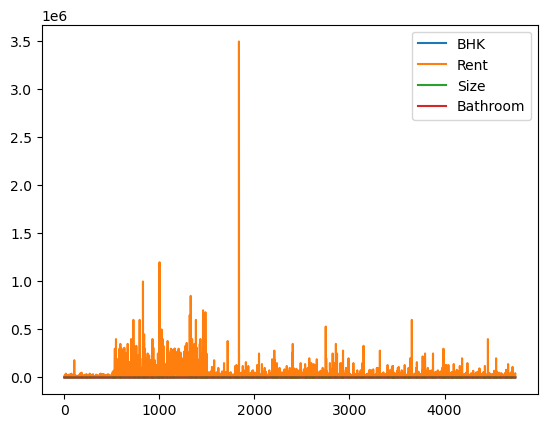

In [29]:
data.plot()

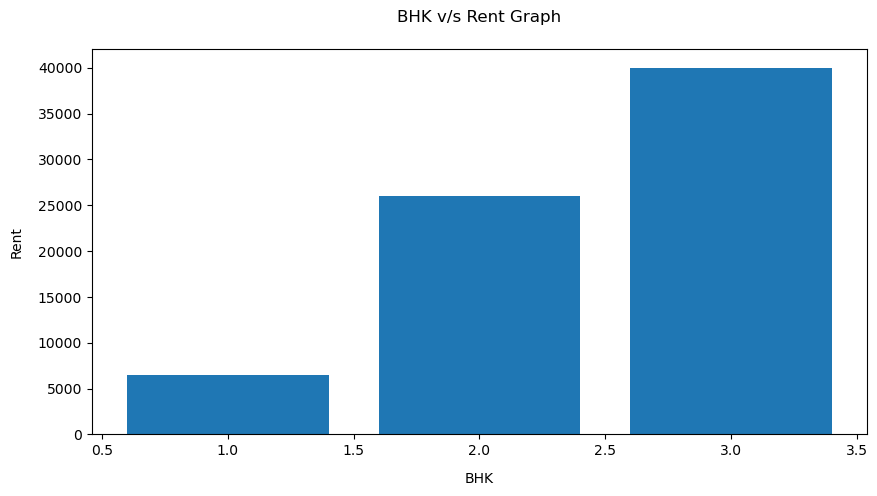

Text(0, 0.5, 'Rent')

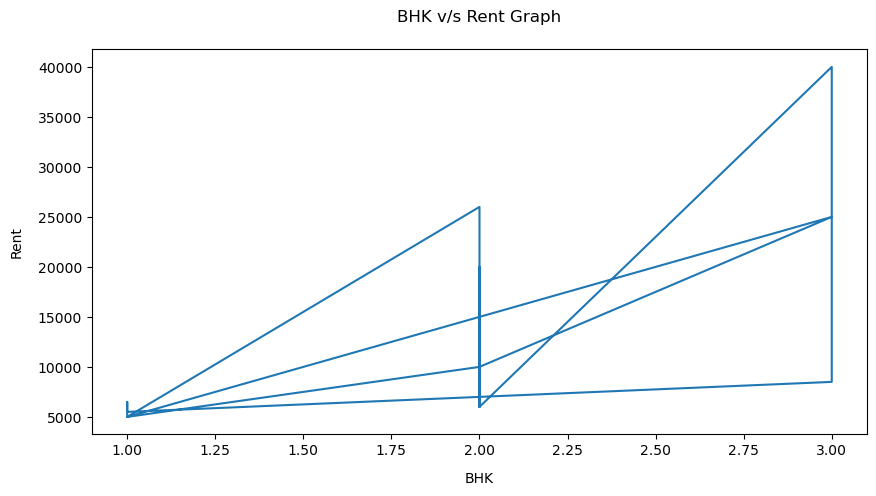

In [30]:
x=data.loc[:20,'BHK']
y=data.loc[:20,'Rent']
fig=plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title("BHK v/s Rent Graph",y=1.05)
plt.xlabel("BHK",labelpad=10)
plt.ylabel("Rent",labelpad=10)
plt.show()
fig=plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.title("BHK v/s Rent Graph",y=1.05)
plt.xlabel("BHK",labelpad=10)
plt.ylabel("Rent",labelpad=10)

PIE CHART OF RENT 


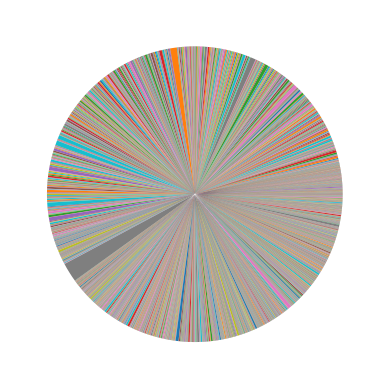

In [31]:
x=data['Rent']
s="PIE CHART OF RENT "
print("\033[1m"+s+"\033[0m")
plt.pie(x)
plt.show()

PIE CHART OF RENT v/s BHK 


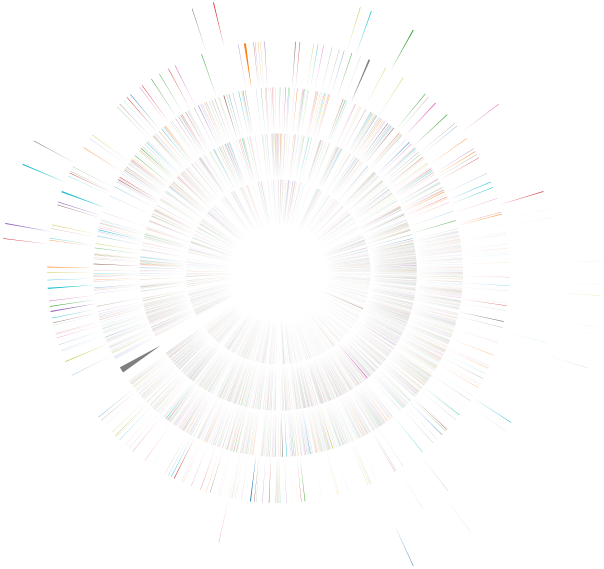

In [32]:
x=data['Rent']
y=data['BHK']
s="PIE CHART OF RENT v/s BHK "
print("\033[1m"+s+"\033[0m")
fig=plt.figure(figsize=(5,5),dpi=30)
plt.pie(x,y)
plt.show()

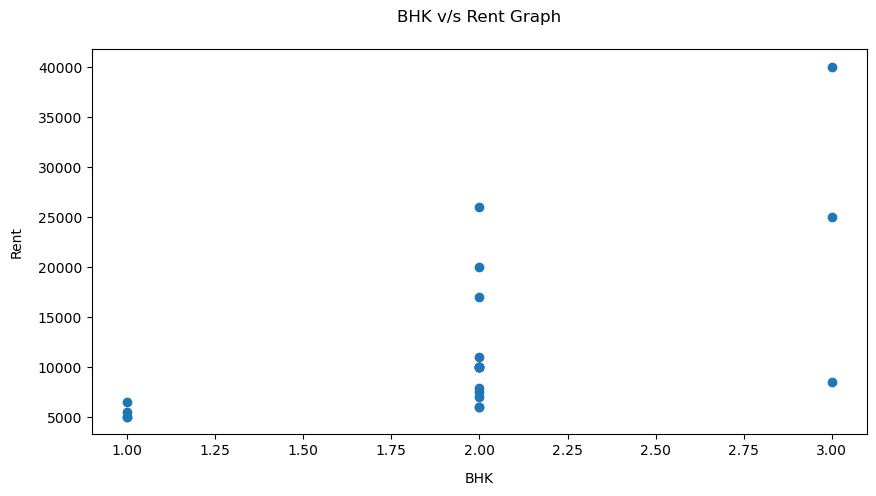

In [33]:
x=data.loc[:20,'BHK']
y=data.loc[:20,'Rent']
fig=plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("BHK v/s Rent Graph",y=1.05)
plt.xlabel("BHK",labelpad=10)
plt.ylabel("Rent",labelpad=10)
plt.show()

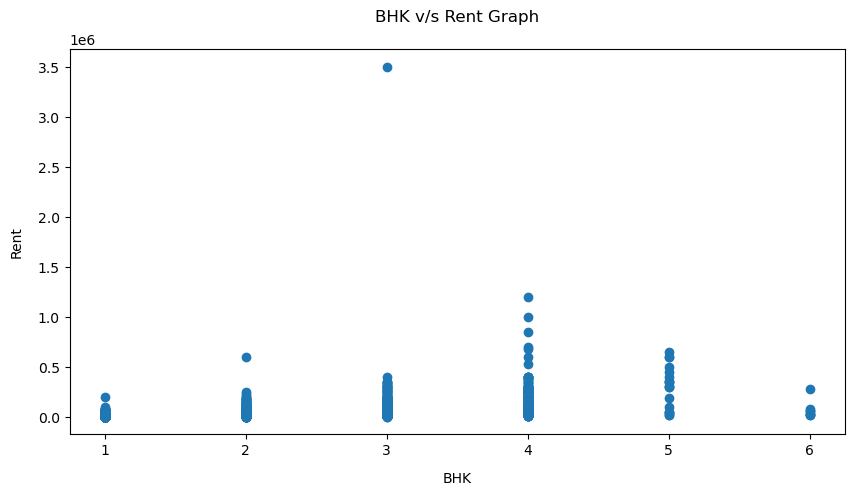

In [34]:
x=data['BHK']
y=data['Rent']
fig=plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("BHK v/s Rent Graph",y=1.05)
plt.xlabel("BHK",labelpad=10)
plt.ylabel("Rent",labelpad=10)
plt.show()

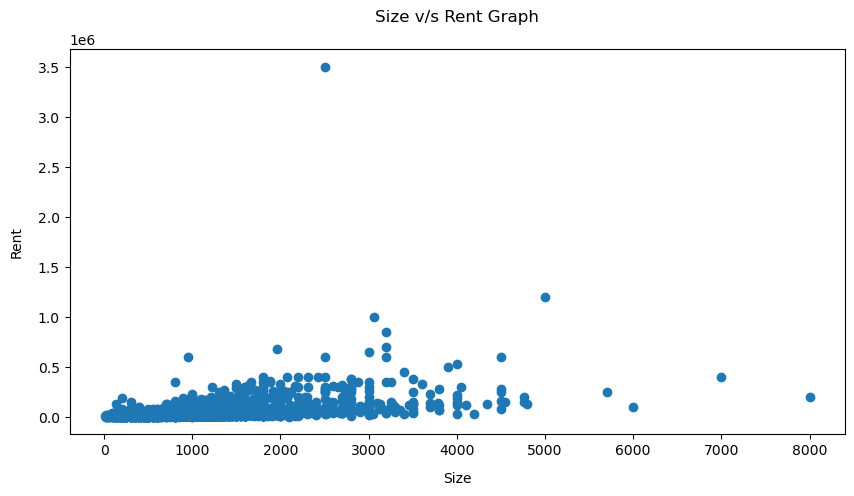

In [35]:
x=data['Size']
y=data['Rent']
fig=plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.title("Size v/s Rent Graph",y=1.05)
plt.xlabel("Size",labelpad=10)
plt.ylabel("Rent",labelpad=10)
plt.show()

In [36]:
c=data['Area Locality'].unique()
print(c)

['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad']


In [37]:
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

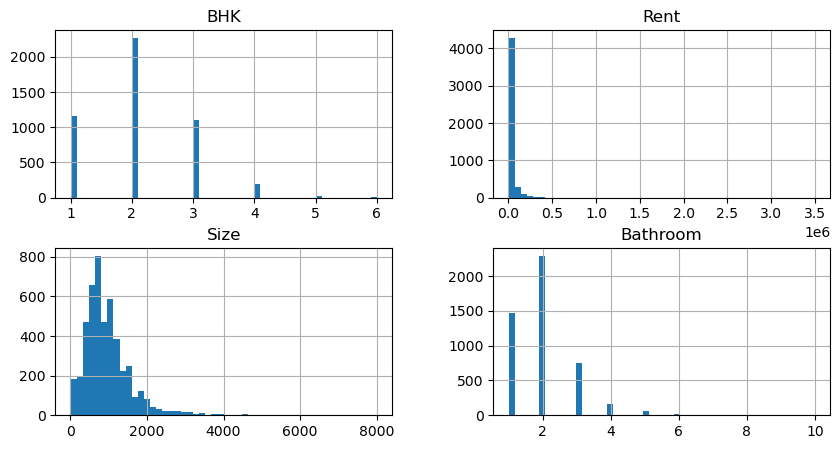

In [38]:
data.hist(bins=50,figsize=(10,5))
plt.show()

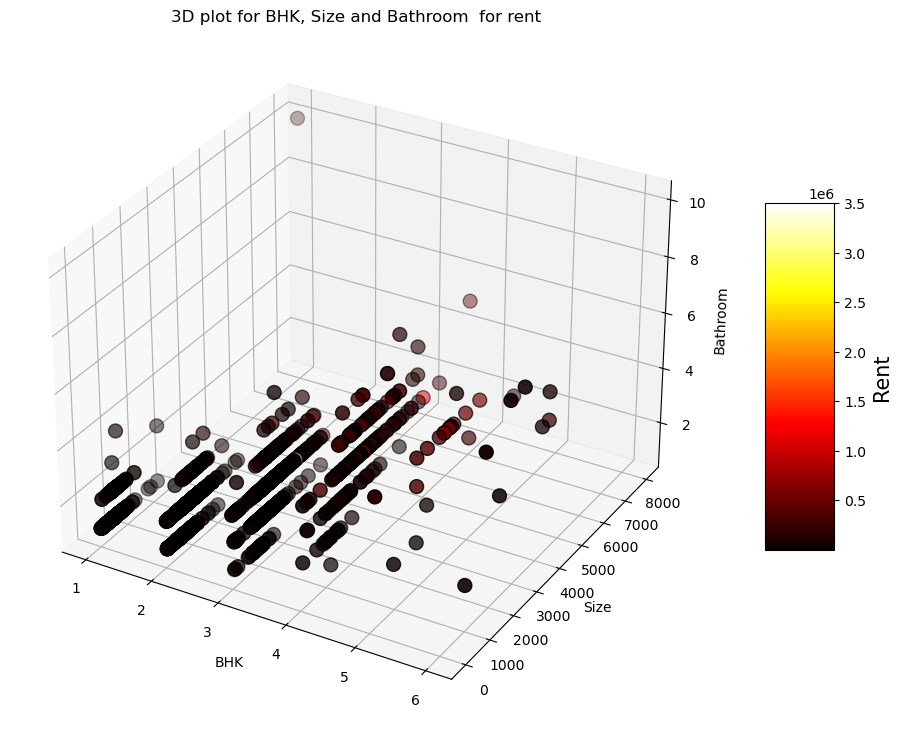

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data loaded in the 'data' variable

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D axes object

plot = ax.scatter(data["BHK"],
                  data["Size"],
                  data["Bathroom"],
                  linewidth=1,
                  edgecolor="k",
                  c=data["Rent"],
                  s=100,
                  cmap="hot")

ax.set_xlabel("BHK")
ax.set_ylabel("Size")
ax.set_zlabel("Bathroom")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Rent",fontsize = 15)

plt.title("3D plot for BHK, Size and Bathroom  for rent",color="black")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_13188\146735397.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


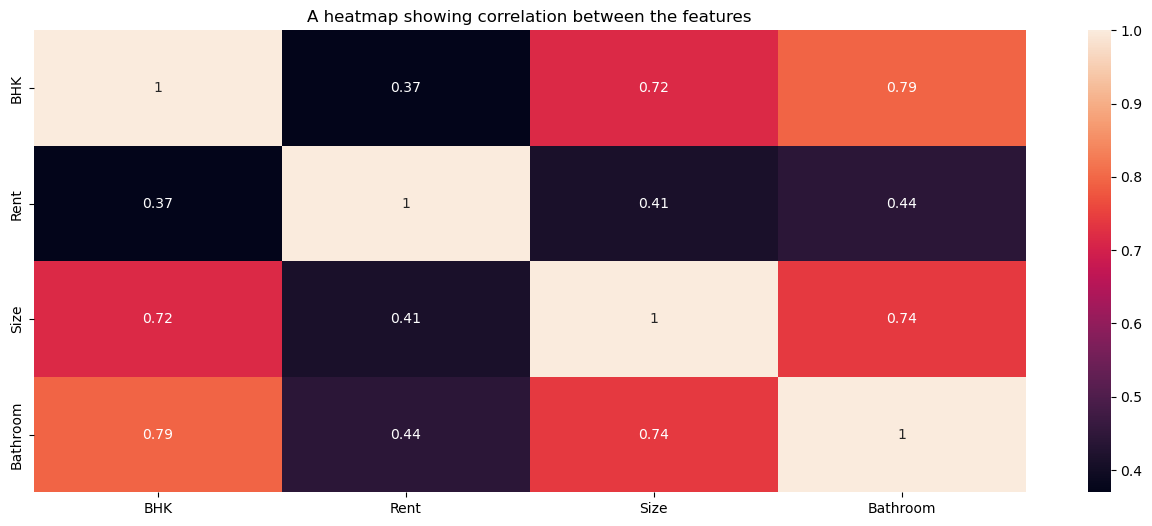

In [40]:
#visualizing the correlation of the features
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)
plt.title("A heatmap showing correlation between the features")
plt.show()

# Model Evaluation

In [41]:
print(f"Mean Rent: {data.Rent.mean()}")  # MEAN    #'data' is the dataframe we have used to store dataset
print(f"Median Rent: {data.Rent.median()}")  #MEDIAN
# print(f"Mode Rent: {data.Rent.mode()}")  #MODE
print(f"Highest Rent: {data.Rent.max()}")   #MAXIMUM VALUE OF RENT
print(f"Lowest Rent: {data.Rent.min()}")   #MINIMUM VALUE OF RENT

Mean Rent: 34993.45132743363
Median Rent: 16000.0
Highest Rent: 3500000
Lowest Rent: 1200


In [42]:
rent_high = data.query('Rent == 3.5e+06')
rent_high

Posted On  BHK     Rent  Size       Floor    Area Type Area Locality  \
1837  08-06-2022    3  3500000  2500  4 out of 4  Carpet Area  Marathahalli   

           City Furnishing Status Tenant Preferred  Bathroom Point of Contact  
1837  Bangalore    Semi-Furnished        Bachelors         3    Contact Agent

In [43]:
rent_low=data.query('Rent == 1200')
rent_low

Posted On  BHK  Rent  Size       Floor    Area Type  Area Locality  \
4076  31-05-2022    3  1200  2100  1 out of 3  Carpet Area  Uppal, NH 2 2   

           City Furnishing Status  Tenant Preferred  Bathroom Point of Contact  
4076  Hyderabad         Furnished  Bachelors/Family         3    Contact Owner

In [44]:
data['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [45]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [47]:
data.shape

(4746, 12)

In [48]:
#number of houses available for rent in different cities
cities = data["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Number of Houses Available for Rent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [49]:
data["Area Type"] = data["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
data["City"] = data["City"].map({"Mumbai": 5, "Chennai": 0, 
                                 "Bangalore": 2, "Hyderabad": 4, 
                                 "Delhi": 1, "Kolkata": 3})
data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})
print(data.head())

    Posted On  BHK   Rent  Size            Floor  Area Type  \
0  18-05-2022    2  10000  1100  Ground out of 2          1   
1  13-05-2022    2  20000   800       1 out of 3          1   
2  16-05-2022    2  17000  1000       1 out of 3          1   
3  04-07-2022    2  10000   800       1 out of 2          1   
4  09-05-2022    2   7500   850       1 out of 2          2   

              Area Locality  City  Furnishing Status  Tenant Preferred  \
0                    Bandel     3                  0                 2   
1  Phool Bagan, Kankurgachi     3                  1                 2   
2   Salt Lake City Sector 2     3                  1                 2   
3               Dumdum Park     3                  0                 2   
4             South Dum Dum     3                  0                 1   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contac

# Splitting data into training and test set

In [50]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]])
y = np.array(data[["Rent"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)


In [51]:
print("Training set: {} and Test set: {}".format(xtrain.shape, xtest.shape))

Training set: (4271, 7) and Test set: (475, 7)


In [52]:
print(len(x))

4746


In [53]:
print(len(y))

4746


In [54]:
print(len(xtrain))

4271


In [55]:
print(len(xtest))

475


In [56]:
print(len(ytrain))

4271


In [57]:
print(len(ytest))

475


# Linear Regression

In [58]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)

LinearRegression()

In [59]:
# Predicting results
y_pred_lr = linear_regressor.predict(xtest)

# Linear Regression - Model Evaluation

In [60]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(ytest, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(ytest, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(ytest, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 27475.317690986292
Mean Squared Error (MSE): 3645948976.841475
Root Mean Squared Error (RMSE): 60381.69405408791


In [61]:
#accuracy
print("Accuracy of Training set: {:.2f}".format(linear_regressor.score(xtrain,ytrain)))
print("Accuracy of Test set: {:.2f}".format(linear_regressor.score(xtest,ytest)))


Accuracy of Training set: 0.24
Accuracy of Test set: 0.39


# Decision Tree

In [62]:
#Decision tree model algorithm
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor()
decision_regressor.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [63]:
#accuracy
print("Accuracy of DT on Training set: {:.2f}".format(decision_regressor.score(xtrain,ytrain)))
print("Accuracy of DT on Test set: {:.2f}".format(decision_regressor.score(xtest,ytest)))


Accuracy of DT on Training set: 0.99
Accuracy of DT on Test set: 0.63


# Random Forest

In [64]:
#Random  forest model algorithm
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.ensemble import RandomForestRegressor
random_regressor=RandomForestRegressor()
random_regressor.fit(xtrain,ytrain)

RandomForestRegressor()

In [65]:
#accuracy
print("Accuracy of DT on Training set: {:.2f}".format(random_regressor.score(xtrain,ytrain)))
print("Accuracy of DT on Test set: {:.2f}".format(random_regressor.score(xtest,ytest)))


Accuracy of DT on Training set: 0.90
Accuracy of DT on Test set: 0.64


# Logistic Regression

In [66]:
#Random  forest model algorithm
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the specific UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.linear_model import LogisticRegression
logistic_regressor=LogisticRegression()
logistic_regressor.fit(xtrain,ytrain)

LogisticRegression()

In [67]:
#accuracy
print("Accuracy of DT on Training set: {:.2f}".format(logistic_regressor.score(xtrain,ytrain)))
print("Accuracy of DT on Test set: {:.2f}".format(logistic_regressor.score(xtest,ytest)))


Accuracy of DT on Training set: 0.06
Accuracy of DT on Test set: 0.05


# Determing the best Algorithm

In [68]:
import pandas as pd

# Create a dictionary with the results of each algorithm
results = {
    'Algorithm': ['Linear Regression', 'Decision tree', 'Random forest'],
    'Accuracy of training set': [0.23, 0.99, 0.88],  # Replace with your actual accuracy values
    'Accuracy of test set': [0.38, 0.55, 0.67],  # Replace with your actual precision values
    
}

# Print the DataFrame

pd.DataFrame(results)


Algorithm  Accuracy of training set  Accuracy of test set
0  Linear Regression                      0.23                  0.38
1      Decision tree                      0.99                  0.55
2      Random forest                      0.88                  0.67

In [69]:
#Rents in different cities according to BHK
import plotly.express as px
import plotly.graph_objects as go
figure = px.bar(data, x=data["City"], 
                y = data["Rent"], 
                color = data["BHK"],
            title="Rent in Different Cities According to BHK")
figure.show()

In [70]:
#number of houses available for rent in different cities
cities = data["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Number of Houses Available for Rent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   int64 
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   int64 
 8   Furnishing Status  4746 non-null   int64 
 9   Tenant Preferred   4746 non-null   int64 
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(8), object(4)
memory usage: 445.1+ KB


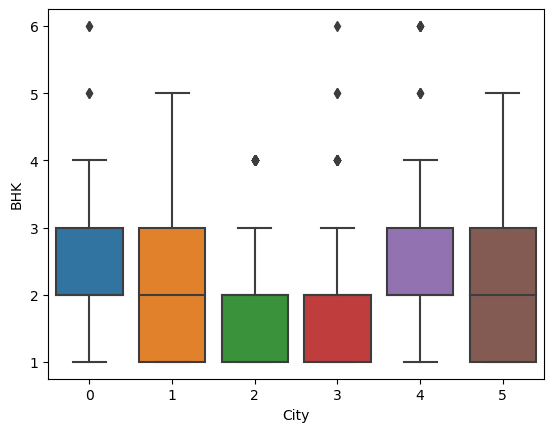

In [72]:
#outliers
import seaborn as sns
sns.boxplot(data=data, x='City', y='BHK')
plt.show()


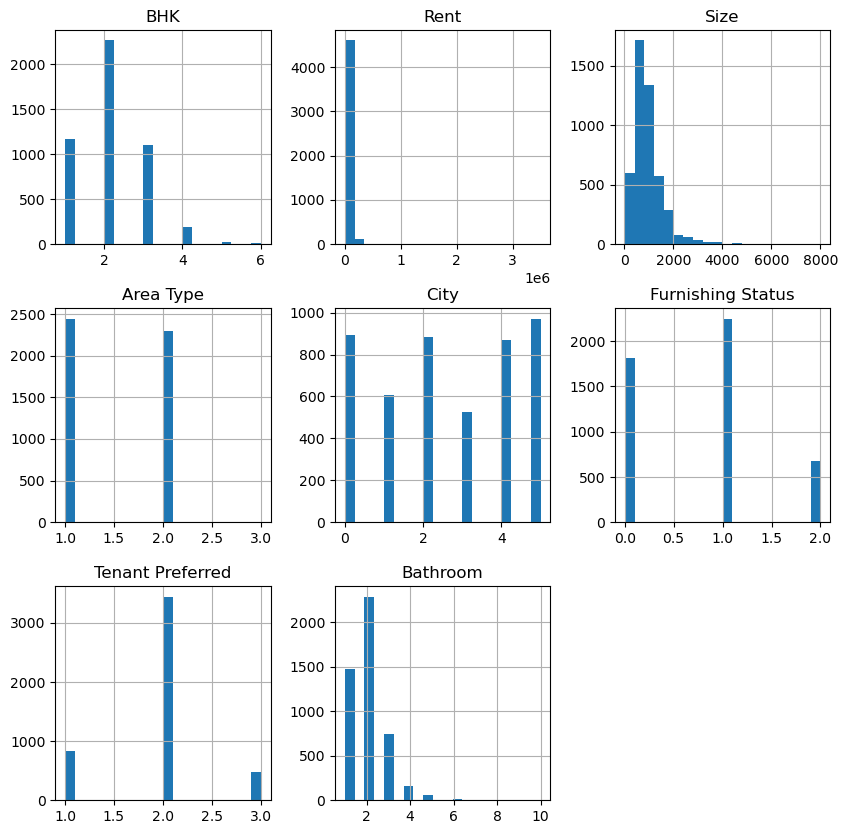

In [73]:
data.hist(bins=20,figsize=(10,10))
plt.show()

# GUI Output


In [74]:
rf=RandomForestRegressor()
rf_final=rf.fit(x,y)

In [75]:
import joblib
joblib.dump(rf_final,'House_Rent_Predictor1')

['House_Rent_Predictor1']

In [76]:
model_hr=joblib.load('House_Rent_Predictor1')

In [77]:
data['Area Type'].unique()

array([1, 2, 3], dtype=int64)

In [78]:
data['Furnishing Status'].unique()

array([0, 1, 2], dtype=int64)

In [79]:
data['Tenant Preferred'].unique()

array([2, 1, 3], dtype=int64)

In [80]:
data['City'].unique()

array([3, 5, 2, 1, 0, 4], dtype=int64)

# Output

In [ ]:
import pandas as pd

from tkinter import *
import joblib

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
   
    
    model_hr = joblib.load('House_Rent_Predictor')
    data_new = pd.DataFrame({
    'BHK':p1,
    'Size':p2,
    'Area Type':p3,
    'City':p4,
    'Furnishing Status':p5,
    'Tenant Preferred':p6,
    'Bathrooms':p7
},index=[0])
    result=model_hr.predict(data_new)
    Label(master, text="Rent amount").grid(row=10)
    Label(master, text=result).grid(row=10)
    print("Rent amount", result[0])
    
master = Tk()
master.title("House Rent  Prediction Using Machine Learning")
label = Label(master, text = "House Rent Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="BHK:").grid(row=1)
Label(master, text="Size").grid(row=2)
Label(master, text="Area Type : 1->Super Area, 2-> Carpet area, 3->Built Area").grid(row=3)
Label(master, text="City: 0->Chennai, 1->Delhi, 2->Bangalore, 3->Kolkata, 4->Hyderabad, 5->Mumbai").grid(row=4)
Label(master, text="Furnishing Status :0-> Fully furnished ,1-> Semi-furnished, 2->Unfurnished").grid(row=5)
Label(master, text="Tenant Preferred : 1->Bachelors, 2-> Bachelors/Family, 3-> Family").grid(row=6)
Label(master, text="Bathrooms").grid(row=7)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields,bg="black", fg = "white").grid()

mainloop()